In [1]:
import gym 
import tensorflow as tf
import random
import PIL
from PIL import Image
from IPython import display
import matplotlib.pyplot as plt
from gym.wrappers.record_video import RecordVideo

In [8]:
!pip install gym[classic_control]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 41.2 MB/s eta 0:00:0000:0100:01


In [11]:
!pip install pyvirtualdisplay

In [12]:

import numpy as np
from pyvirtualdisplay import Display

In [31]:
env=gym.make('CartPole-v1',render_mode='rgb_array')
states=env.observation_space.shape[0]
actions=env.action_space.n
print(f"States:{states} , Actions:{actions}")

States:4 , Actions:2


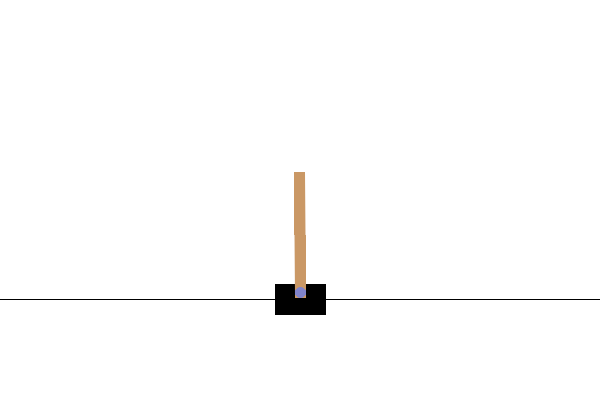

In [28]:
env.reset()
PIL.Image.fromarray(env.render())

In [17]:
display = Display(visible=0, size=(1400, 900))


In [26]:
episodes=10

for episode in range(1,episodes+1):
    state=env.reset()
    done=False
    score=0
    
    
    while not done:
        env.render()
        action=random.choice([0,1])
        n_state,reward,done,_,info=env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode,score))


Episode:1 Score:28.0
Episode:2 Score:18.0
Episode:3 Score:71.0
Episode:4 Score:22.0
Episode:5 Score:26.0
Episode:6 Score:27.0
Episode:7 Score:24.0
Episode:8 Score:24.0
Episode:9 Score:10.0
Episode:10 Score:18.0


In [29]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [33]:
def build_model(states , actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1,states)))
    model.add(Dense(24,activation='relu'))
    model.add(Dense(24,activation='relu'))
    model.add(Dense(actions,activation='linear'))
    return model

In [34]:
model=build_model(states,actions)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 24)                120       
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
 dense_2 (Dense)             (None, 2)                 50        
                                                                 
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________


In [41]:
!pip install keras-rl2
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

### USING KERAS RL 

In [46]:
def build_agent(model,actions):
    policy = BoltzmannQPolicy()
    memory=SequentialMemory(limit=5000 , window_length=1)
    dqn = DQNAgent(model=model , memory=memory ,policy=policy , nb_actions=actions , nb_steps_warmup =10 , target_model_update = 1e-2)
    return dqn

In [47]:
build_agent(model,actions)